# CS 240 Assignment 2 

# Taj Saleh - 214172235

In [1]:

import nsfg

import thinkstats2
import thinkplot
%matplotlib inline

In [2]:
resp = nsfg.ReadFemResp()

In [3]:
School = resp[resp.hieduc<10]
university = resp[resp.hieduc>10]

In [22]:
# resp.columns

In [5]:
print "mean , median , std , variance , mode for Univeristy part"
university.agemomb1.mean(),university.agemomb1.median(),university.agemomb1.std(),university.agemomb1.var(),university.agemomb1.mode()

mean , median , std , variance , mode for Univeristy part


(4.379020979020979, 3.0, 11.142874202659534, 124.16364549629535, 0    3
 dtype: int64)

In [6]:
print "mean , median , std , variance , mode for School part"
School.agemomb1.mean(),School.agemomb1.median(),School.agemomb1.std(),School.agemomb1.var(),School.agemomb1.mode()

mean , median , std , variance , mode for School part


(3.656943727413526, 3.0, 10.405328907118122, 108.27086966530803, 0    3
 dtype: int64)

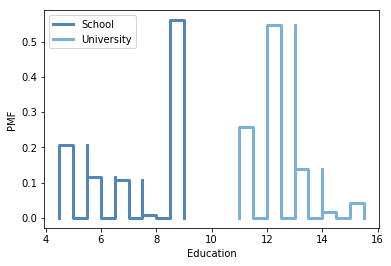

In [7]:
width = 0.5


school_pmf = thinkstats2.Pmf(School.hieduc,     label='School')
uni_pmf = thinkstats2.Pmf(university.hieduc, label = 'University')
# plot PMFs of birth weights for first babies and others
thinkplot.PrePlot(2)
thinkplot.Pmf(school_pmf, align='right', width=width)
thinkplot.Pmf(uni_pmf, align='left',  width=width)
thinkplot.Config(xlabel='Education', ylabel='PMF')


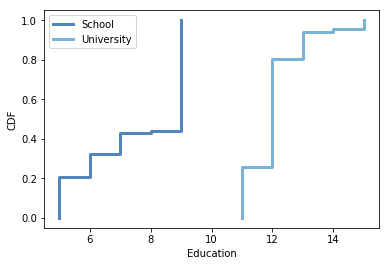

In [8]:


thinkplot.preplot(2)
first = thinkstats2.Cdf(School.hieduc,      label='School')
other = thinkstats2.Cdf(university.hieduc,  label = 'University')
thinkplot.Cdfs([first,other])
thinkplot.Config(xlabel='Education', ylabel='CDF')

In [9]:
sm = School.agemomb1
um = university.agemomb1


In [10]:
# hist = thinkstats2.Hist(sm, label='birthwgt_lb')
# hist

pmf = thinkstats2.Pmf(sm)
pmf

Pmf({96L: 0.012390294269488901, 1L: 0.24135260712441922, 2L: 0.22767165720185856, 3L: 0.3549303045947341, 4L: 0.11228704181724317, 5L: 0.05136809499225607})

In [11]:
# hist1 = thinkstats2.Hist(um, label='birthwgt_lb')
# hist1

pmf1 = thinkstats2.Pmf(um)
pmf1

Pmf({96L: 0.014452214452214451, 1L: 0.08391608391608392, 2L: 0.16037296037296037, 3L: 0.4536130536130536, 4L: 0.21212121212121213, 5L: 0.07552447552447553})

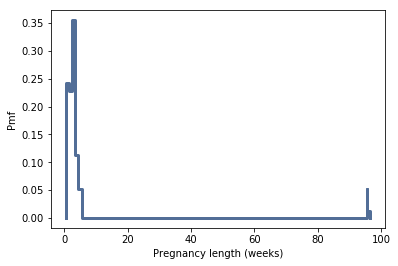

In [12]:

thinkplot.Pmf(pmf)
thinkplot.Config(xlabel='difference for ages of mothers', ylabel='Pmf')

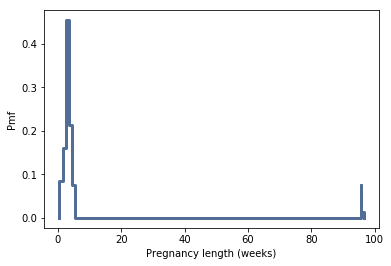

In [13]:
thinkplot.Pmf(pmf1)
thinkplot.Config(xlabel='difference for ages of mothers', ylabel='Pmf')

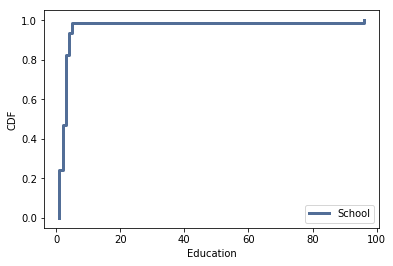

In [14]:
first = thinkstats2.Cdf(School.agemomb1 , label = 'School')

thinkplot.Cdf(first)
thinkplot.Config(xlabel = 'Education' , ylabel = 'CDF')

In [15]:
## School
pmf = thinkstats2.Pmf(sm)
m18 = []
p18 =[]
for i in pmf:
    if i < 18:
        m18.append(pmf[i]*100)
    else :
        p18.append(pmf[i]*100)
        
## Univeristy
pmf2 = thinkstats2.Pmf(um)
mm18 = []
pp18 =[]
for i in pmf2:
    if i < 18:
        mm18.append(pmf2[i]*100)
    else:
        pp18.append(pmf2[i]*100)
        
print m18 # School
print mm18 # University
print "<>~~~~~~~~~~~~<>~~~~~~~~~~~~~~~<>  Above 18 below"

print p18 # School
print pp18 # University


[24.135260712441923, 22.767165720185854, 35.49303045947341, 11.228704181724316, 5.136809499225607]
[8.391608391608392, 16.037296037296038, 45.36130536130536, 21.21212121212121, 7.5524475524475525]
<>~~~~~~~~~~~~<>~~~~~~~~~~~~~~~<>  Above 18 below
[1.2390294269488902]
[1.4452214452214451]


In [16]:
def EvalCdf(sample, x):
    count = 0.0
    for value in sample:
        if value <= x:
            count += 1
    prob = count / len(sample)
    return prob

print "   probability of mothers are under 18 years old:"
for i in m18:
    print "probability of ",i," is ",EvalCdf(m18,i)," in School"
print "<>~~~~~~~~~~~~<>~~~~~~~~~~~~~~~<> "
for j in mm18:
    print "probability of ",j," is ",EvalCdf(mm18,j)," in University"

   probability of mothers are under 18 years old:
probability of  24.1352607124  is  0.8  in School
probability of  22.7671657202  is  0.6  in School
probability of  35.4930304595  is  1.0  in School
probability of  11.2287041817  is  0.4  in School
probability of  5.13680949923  is  0.2  in School
<>~~~~~~~~~~~~<>~~~~~~~~~~~~~~~<> 
probability of  8.39160839161  is  0.4  in University
probability of  16.0372960373  is  0.6  in University
probability of  45.3613053613  is  1.0  in University
probability of  21.2121212121  is  0.8  in University
probability of  7.55244755245  is  0.2  in University


In [17]:
def PercentileRank(scores, your_score):
    count = 0
    for score in scores:
        if score <= your_score:
            count += 1
        percentile_rank = 100.0 * count / len(scores)
    return percentile_rank


# print "   percentile of mothers are under 18 years old:"
# for i in m18:
#     print "percentile of ",i," is ",PercentileRank(m18,i)," in School"
# print "<>~~~~~~~~~~~~<>~~~~~~~~~~~~~~~<> "
# for j in mm18:
#     print "percentile of ",j," is ",PercentileRank(mm18,j)," in University"

# print "---------------------------------------------------------"


print "   percentile of mothers are 18 and older than 18 years old:"
for i in p18:
    print "percentile of ",i," is ",PercentileRank(p18,i)," in School"
print "<>~~~~~~~~~~~~<>~~~~~~~~~~~~~~~<> "
for j in pp18:
    print "percentile of ",j," is ",PercentileRank(pp18,j)," in University"
 


   percentile of mothers are 18 and older than 18 years old:
percentile of  1.23902942695  is  100.0  in School
<>~~~~~~~~~~~~<>~~~~~~~~~~~~~~~<> 
percentile of  1.44522144522  is  100.0  in University


In [18]:
##### CDF Distribution 

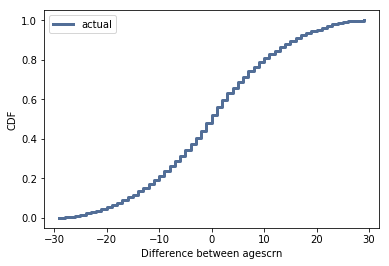

In [24]:
# resp.agescrn

diffs = resp.agescrn.diff()

cdf = thinkstats2.Cdf(diffs, label='actual')
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Difference between agescrn', ylabel='CDF')

In [20]:
#### PMF Distribution

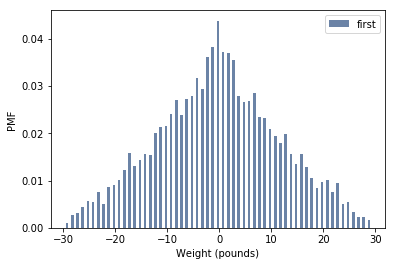

In [21]:
width = 0.5

# plot PMFs of birth weights for first babies and others
diffs2 = thinkstats2.Pmf(diffs, label='first')
thinkplot.Hist(diffs2, align='right', width=width)
thinkplot.Config(xlabel='Difference between agescrn', ylabel='PMF')